In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [3]:
df_fake25 = pd.read_csv("fak25.csv")
df_true25 = pd.read_csv("tru25.csv")

In [4]:
df_fake25.head(5)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [5]:
df_true25.head(5)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


In [6]:
df_fake25["class"] = 0
df_true25["class"] = 1

In [7]:
df_fake25.shape, df_true25.shape


((12008, 5), (12008, 5))

In [8]:
df_fake_manual_testing25 = df_fake25.tail(10)
for i in range(12007,11997,-1):
    df_fake25.drop([i], axis = 0, inplace = True)
df_true_manual_testing25 = df_true25.tail(10)
for i in range(12007,11997,-1):
    df_true25.drop([i], axis = 0, inplace = True)

In [9]:
df_fake25.shape, df_true25.shape


((11998, 5), (11998, 5))

In [10]:
df_fake_manual_testing25["class"] = 0
df_true_manual_testing25["class"] = 1

<ipython-input-10-b95eb4902665>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing25["class"] = 0
<ipython-input-10-b95eb4902665>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing25["class"] = 1


In [11]:
df_fake_manual_testing25.head(10)


,title,text,subject,date,class
11998,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,In the wake of yet another court decision that...,politics,4-Jan-17,0
11999,WHEW! AMB JOHN BOLTON Will Make Your Day With ...,.@AmbJohnBolton on Obama legacy: He s history...,politics,4-Jan-17,0
12000,WOW! SARCASTIC MIKE BARNICLE Gets An Earful Fr...,BARNICLE: So you re asking the Democrats to be...,politics,4-Jan-17,0
12001,"JULIAN ASSANGE GETS EMOTIONAL Over His Family,...",I know what I m doing. I m prepared to wear t...,politics,4-Jan-17,0
12002,THINGS ARE ABOUT TO GET UGLY: GOP Introduces P...,Republicans have put forward a plan to stop Ob...,politics,3-Jan-17,0
12003,THE OBAMAS MILK EVERY LAST MINUTE: Will Throw ...,"Of course, there s no official word from the W...",politics,3-Jan-17,0
12004,INVITED POP STAR SAYS SHE’LL PERFORM At Trump ...,"British pop singer Rebecca Ferguson, daughter ...",politics,3-Jan-17,0
12005,SHOCKING AUDIO RELEASED Of John Kerry Discussi...,WHAT S WORSE IS THE SECOND LONGER VERSION OF T...,politics,3-Jan-17,0
12006,BREAKING: FORD CEO CITES TRUMP In Announcement...,The Government-Orchestrated Bankruptcies Of G...,politics,3-Jan-17,0
12007,BREAKING: FORD ANNOUNCES $700 Million U.S. Inv...,article,politics,3-Jan-17,0


In [12]:
df_true_manual_testing25.head(10)


,title,text,subject,date,class
11998,Kurdish protesters set fire to party offices i...,"SULAIMANIYAH, Iraq (Reuters) - Kurdish protest...",worldnews,18-Dec-17,1
11999,Russia expects de Mistura to visit Moscow in 2...,MOSCOW (Reuters) - Russian Deputy Foreign Mini...,worldnews,18-Dec-17,1
12000,U.S. citizen recaptured after Bali jail break,"DENPASAR, Indonesia (Reuters) - Indonesian pol...",worldnews,18-Dec-17,1
12001,Kurdish authorities say Iraq forces preparing ...,BAGHDAD (Reuters) - Iraqi forces are preparing...,worldnews,18-Dec-17,1
12002,"As Catalan vote looms, jailed leader offers ol...",MADRID/BARCELONA (Reuters) - The jailed leader...,worldnews,18-Dec-17,1
12003,China defends trade with U.S. as Trump set to ...,BEIJING (Reuters) - China s Foreign Ministry o...,worldnews,18-Dec-17,1
12004,German ex-rightist jailed for plotting Islamis...,BERLIN (Reuters) - A German court sentenced a ...,worldnews,18-Dec-17,1
12005,Bulgaria arrests gang suspected of smuggling m...,SOFIA (Reuters) - Bulgarian authorities have d...,worldnews,18-Dec-17,1
12006,Egypt security forces kill five suspected mili...,CAIRO (Reuters) - Egyptian security forces on ...,worldnews,18-Dec-17,1
12007,Moldova recalls ambassador from Moscow as disp...,KIEV/CHISINAU (Reuters) - Moldova recalled its...,worldnews,18-Dec-17,1


In [13]:
df_manual_testing25 = pd.concat([df_fake_manual_testing25,df_true_manual_testing25], axis = 0)
df_manual_testing25.to_csv("manual_testing25.csv")

In [14]:
df_marge25 = pd.concat([df_fake25, df_true25], axis =0 )
df_marge25.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,25-Dec-17,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,23-Dec-17,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,23-Dec-17,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,22-Dec-17,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,21-Dec-17,0


In [15]:
df_marge25.columns


Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
df = df_marge25.drop(["title", "subject","date"], axis = 1)


In [17]:
df.isnull().sum()


text     0
class    0
dtype: int64

In [18]:
df = df.sample(frac = 1)


In [19]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [20]:
df.columns


Index(['text', 'class'], dtype='object')

In [21]:
df.head()


,text,class
0,It s a bromance for the ages. One that may go ...,0
1,A black woman went into a fit of rage after sh...,0
2,WASHINGTON (Reuters) - U.S. President Barack O...,1
3,NAIROBI (Reuters) - South Sudan s army clashed...,1
4,MOSCOW (Reuters) - Russian Foreign Minister Se...,1


In [22]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [23]:
df["text"] = df["text"].apply(wordopt)


In [24]:
x = df["text"]
y = df["class"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [27]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [28]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier()
clf2 = SVC()
clf3 = DecisionTreeClassifier()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'SVC', 
                       'DCT',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, xv_train, y_train, 
                                             
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.62 (+/- 0.00) [KNN]
Accuracy: 0.99 (+/- 0.00) [SVC]
Accuracy: 1.00 (+/- 0.00) [DCT]
Accuracy: 1.00 (+/- 0.00) [StackingClassifier]


In [29]:
sclf.fit(xv_train, y_train)
pred_dt = sclf.predict(xv_test)

In [30]:
sclf.score(xv_test, y_test)


0.9949991665277547

In [31]:
print(classification_report(y_test, pred_dt))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2951
           1       1.00      1.00      1.00      3048

    accuracy                           0.99      5999
   macro avg       0.99      0.99      0.99      5999
weighted avg       0.99      0.99      0.99      5999



In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_dt)
print(cm)

[[2936   15]
 [  15 3033]]


In [33]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("confusion matrix, without normalization")
  print(cm)
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

confusion matrix, without normalization
[[2936   15]
 [  15 3033]]


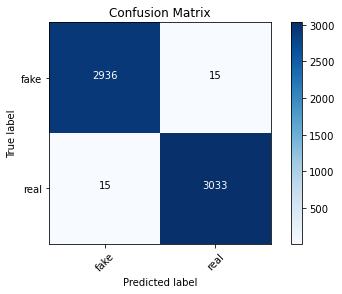

In [34]:
cm_plot_labels = ["fake","real"]
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

In [35]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing25(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_sclf = sclf.predict(new_xv_test)
    pro=sclf.predict_proba(new_xv_test)
    #print(pro[0]," ",pro[1])
    #print(pro[0][1])
   # print(pred_sclf[1])
    return print("\nThe given news is :{} % percentage is : {}\n".format((pro[0][pred_sclf[0]]*100),output_lable(pred_sclf[0])))

In [57]:
news = str(input())
manual_testing25(news)

Factbox: International reaction to arrest of Reuters reporters in Myanmar

The given news is :99.8912366101476 % percentage is : Not A Fake News

